# Exploratory Data Analysis

In [1]:
import os
import pandas as pd
import cv2 as cv

In [2]:
DATA_DIR = "/nas-ctm01/datasets/public/BIOMETRICS"
P800_DIR = os.path.join(DATA_DIR, "pornography-database", "data")
P2K_DIR = os.path.join(DATA_DIR, "pornography-2k-db", "data", "original")
APD_DIR = os.path.join(DATA_DIR, "apd-video-db", "data")

In [22]:
def get_video_specs(video_path):
  video = cv.VideoCapture(video_path)

  _, fname = os.path.split(video_path)
  fname = fname.split(".")[0]
  label = 'non-porn' if 'NonPorn' in fname else 'porn'

  frame_width = int(video.get(cv.CAP_PROP_FRAME_WIDTH))    
  frame_height = int(video.get(cv.CAP_PROP_FRAME_HEIGHT))

  fps = video.get(cv.CAP_PROP_FPS)
  frame_count = int(video.get(cv.CAP_PROP_FRAME_COUNT))
  duration = frame_count/fps

  video.release()

  return { 
    "fname": fname, 
    "label": label, 
    "frame_count": frame_count, 
    "frame_width": frame_width, 
    "frame_height": frame_height,
    "duration": duration 
  }

## Pornography-800 Dataset

In [23]:
p800_videos_dir = os.path.join(P800_DIR, "Database") 
p800_frames_dir = os.path.join(P800_DIR, "Frames")
p800_segments_dir = os.path.join(P800_DIR, "Segments")

content_types = ["vNonPornEasy", "vNonPornDifficulty", "vPorn"]

In [24]:
p800_videos_data = {
  "fname": [],
  "label": [],
  "frame_count": [],
  "frame_width": [],
  "frame_height": [],
  "duration_s": []
}

p800_frames_data = {
  "video": [],
  "frame_n": []
}

p800_segments_data = {
  "video": [],
  "segment_n": [],
  "duration_s": []
}

for type in content_types:
  # Get whole videos
  for video in os.listdir(os.path.join(p800_videos_dir, type)):
    if video.startswith("."): continue

    specs = get_video_specs(os.path.join(p800_videos_dir, type, video))
    
    p800_videos_data["fname"].append(specs["fname"])
    p800_videos_data["label"].append(specs["label"])
    p800_videos_data["frame_count"].append(specs["frame_count"])
    p800_videos_data["frame_width"].append(specs["frame_width"])
    p800_videos_data["frame_height"].append(specs["frame_height"])
    p800_videos_data["duration_s"].append(specs["duration"])

  # Get frames and associate them with corresponding video
  for frame in os.listdir(os.path.join(p800_frames_dir, type)):
    if frame.startswith("."): continue

    frame_video, frame_n = frame.split(".")[0].split("#")
    
    p800_frames_data["video"].append(frame_video)
    p800_frames_data["frame_n"].append(int(frame_n))

  # Get segments and associate them with corresponding video
  for segment in os.listdir(os.path.join(p800_segments_dir, type)):
    if segment.startswith("."): continue

    specs = get_video_specs(os.path.join(p800_segments_dir, type, segment))
    segment_video, segment_n = specs["fname"].split("#")

    p800_segments_data["video"].append(segment_video)
    p800_segments_data["segment_n"].append(int(segment_n))
    p800_segments_data["duration_s"].append(specs["duration"])

p800_videos = pd.DataFrame(p800_videos_data)
p800_frames = pd.DataFrame(p800_frames_data)
p800_segments = pd.DataFrame(p800_segments_data)

In [25]:
p800_videos["duration_m"] = p800_videos["duration_s"] / 60
p800_videos["duration_h"] = p800_videos["duration_s"] / 3600

p800_segments["duration_m"] = p800_segments["duration_s"] / 60
p800_segments["duration_h"] = p800_segments["duration_s"] / 3600

In [26]:
p800_videos = p800_videos.sort_values(by=["fname"]).reset_index(drop=True)
p800_videos

,fname,label,frame_count,frame_width,frame_height,duration_s,duration_m,duration_h
0,vNonPorn1,non-porn,1375,300,240,45.833333,0.763889,0.012731
1,vNonPorn10,non-porn,2465,320,240,98.600000,1.643333,0.027389
2,vNonPorn100,non-porn,2945,480,360,117.800000,1.963333,0.032722
3,vNonPorn1006,non-porn,3782,400,226,126.417827,2.106964,0.035116
4,vNonPorn1007,non-porn,1839,320,218,61.361300,1.022688,0.017045
...,...,...,...,...,...,...,...,...
795,vPorn94,porn,5624,520,300,187.654133,3.127569,0.052126
796,vPorn95,porn,48039,520,390,1605.760446,26.762674,0.446045
797,vPorn96,porn,41220,520,390,1377.827298,22.963788,0.382730
798,vPorn97,porn,23178,480,360,927.120000,15.452000,0.257533


In [27]:
p800_frames = p800_frames.sort_values(by=["video","frame_n"]).reset_index(drop=True)
p800_frames

,video,frame_n
0,vNonPorn1,1
1,vNonPorn1,2
2,vNonPorn1,3
3,vNonPorn1,4
4,vNonPorn1,5
...,...,...
16722,vPorn98,3
16723,vPorn98,4
16724,vPorn98,5
16725,vPorn98,6


In [28]:
# Check for duplicate 'fname' values - True (no dups), False (dups)
p800_videos["fname"].is_unique

True

In [29]:
# Check for duplicate 'segment_n' values (empty df - no dups)
p800_frames[p800_frames.duplicated()]

,video,frame_n


In [30]:
print("Total number of videos in p800_videos:", p800_videos.nunique()["fname"])
print("Total number of videos in p800_frames:", p800_frames.nunique()["video"])

Total number of videos in p800_videos: 800
Total number of videos in p800_frames: 802


In [31]:
video_frames = p800_frames.groupby("video")["frame_n"].apply(set)
n_frames_per_video = p800_frames.groupby("video")["frame_n"].count()

In [32]:
# Videos that exist in p800_videos but not in p800_frames
set(p800_videos[~p800_videos["fname"].isin(video_frames.index)]["fname"])


{'vNonPorn1146', 'vNonPorn559', 'vPorn448', 'vPorn480'}

In [33]:
# Videos that exist in p800_frames but not in p800_videos 
set(video_frames.index[~video_frames.index.isin(p800_videos["fname"])])

{'vNonPorn1177',
 'vNonPorn233',
 'vNonPorn599',
 'vPorn195',
 'vPorn197',
 'vPorn333'}

In [34]:
p800_segments = p800_segments.sort_values(by=["video","segment_n"]).reset_index(drop=True)
p800_segments

,video,segment_n,duration_s,duration_m,duration_h
0,vNonPorn1,1,4.133329,0.068889,0.001148
1,vNonPorn1,2,2.033331,0.033889,0.000565
2,vNonPorn1,3,2.666664,0.044444,0.000741
3,vNonPorn1,4,18.799981,0.313333,0.005222
4,vNonPorn1,5,5.366661,0.089444,0.001491
...,...,...,...,...,...
16722,vPorn98,3,266.138608,4.435643,0.073927
16723,vPorn98,4,108.300564,1.805009,0.030083
16724,vPorn98,5,124.813057,2.080218,0.034670
16725,vPorn98,6,162.417420,2.706957,0.045116


In [35]:
video_segments = p800_segments.groupby("video")["segment_n"].apply(set)
n_segments_per_video = p800_segments.groupby("video")["segment_n"].count()

In [36]:
# Videos that exist in p800_videos but not in p800_segments
set(p800_videos[~p800_videos["fname"].isin(video_segments.index)]["fname"])

{'vNonPorn1146', 'vNonPorn559', 'vPorn448', 'vPorn480'}

In [37]:
# Videos that exist in p800_segments but not in p800_videos 
set(video_segments.index[~video_segments.index.isin(p800_videos["fname"])])

{'vNonPorn1177',
 'vNonPorn233',
 'vNonPorn599',
 'vPorn195',
 'vPorn197',
 'vPorn333'}

In [38]:
# TODO: only after checking difference in the number of videos

# p800_videos = p800_videos.merge(video_frames, how="left", left_on="fname", right_on="video")
# p800_videos.rename(columns={ "frame_n": "selected_frames" }, inplace=True)

# p800_videos = p800_videos.merge(n_frames_per_video, how="left", left_on="fname", right_on="video")
# p800_videos.rename(columns={ "frame_n": "selected_frames_count" }, inplace=True)

# p800_videos = p800_videos.merge(video_segments, how="left", left_on="fname", right_on="video")
# p800_videos.rename(columns={ "segment_n": "selected_segments" }, inplace=True)

# p800_videos = p800_videos.merge(n_segments_per_video, how="left", left_on="fname", right_on="video")
# p800_videos.rename(columns={ "segment_n": "selected_segments_count" }, inplace=True)

# p800_videos

In [39]:
p800_videos.describe()

,frame_count,frame_width,frame_height,duration_s,duration_m,duration_h
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,9914.87750,428.420000,308.411250,345.781612,5.763027,0.096050
std,11170.35545,128.234038,92.478551,379.012927,6.316882,0.105281
min,44.00000,128.000000,88.000000,7.807800,0.130130,0.002169
25%,2731.25000,320.000000,240.000000,101.654950,1.694249,0.028237
50%,5818.00000,400.000000,240.000000,210.021667,3.500361,0.058339
75%,12132.00000,520.000000,390.000000,418.783333,6.979722,0.116329
max,60450.00000,1280.000000,720.000000,2020.612813,33.676880,0.561281


In [40]:
p800_segments.describe()

,segment_n,duration_s,duration_m,duration_h
count,16727.000000,16727.000000,16727.000000,16727.000000
mean,34.408561,16.727093,0.278785,0.004646
std,39.828583,52.811663,0.880194,0.014670
min,1.000000,0.016690,0.000278,0.000005
25%,8.000000,1.871862,0.031198,0.000520
50%,21.000000,4.066667,0.067778,0.001130
75%,46.000000,10.830056,0.180501,0.003008
max,311.000000,1744.107046,29.068451,0.484474


In [41]:
p800_porn = p800_videos[p800_videos["label"] == "porn"]
p800_porn.describe()

,frame_count,frame_width,frame_height,duration_s,duration_m,duration_h
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,14790.880000,513.210000,369.802500,511.506685,8.525111,0.142085
std,13456.506298,103.086872,76.603418,454.698550,7.578309,0.126305
min,253.000000,256.000000,208.000000,10.120000,0.168667,0.002811
25%,4942.750000,480.000000,336.000000,179.695000,2.994917,0.049915
50%,8758.000000,520.000000,390.000000,301.101393,5.018357,0.083639
75%,22483.250000,584.000000,438.000000,750.685759,12.511429,0.208524
max,60450.000000,720.000000,576.000000,2020.612813,33.676880,0.561281


In [42]:
p800_non_porn = p800_videos[p800_videos["label"] == "non-porn"]
p800_non_porn.describe()

,frame_count,frame_width,frame_height,duration_s,duration_m,duration_h
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,5038.875000,343.630000,247.020000,180.056539,3.000942,0.050016
std,4595.526979,88.811722,60.837922,160.759403,2.679323,0.044655
min,44.000000,128.000000,88.000000,7.807800,0.130130,0.002169
25%,1611.000000,320.000000,233.500000,61.154308,1.019238,0.016987
50%,3761.000000,320.000000,240.000000,132.482883,2.208048,0.036801
75%,7004.000000,320.000000,240.000000,253.258971,4.220983,0.070350
max,29612.000000,1280.000000,720.000000,1216.791667,20.279861,0.337998


In [24]:
print(f"{p800_porn['duration_h'].sum():.2f} hours ({p800_porn['duration_m'].sum():.2f} minutes) of pornographic content")
print(f"{p800_non_porn['duration_h'].sum():.2f} hours ({p800_non_porn['duration_m'].sum():.2f} minutes) of non-pornographic content")

56.83 hours (3410.05 minutes) of pornographic content
20.61 hours (1236.40 minutes) of non-pornographic content


## Pornography-2k Dataset

In [25]:
p2k_data = {
  "fname": [],
  "label": [],
  "frame_count": [],
  "frame_width": [],
  "frame_height": [],
  "duration_s": [],
}

for video in os.listdir(P2K_DIR):
  if video.startswith("."): continue
  
  specs = get_video_specs(os.path.join(P2K_DIR, video))

  p2k_data["fname"].append(specs["fname"])
  p2k_data["label"].append(specs["label"])
  p2k_data["frame_count"].append(specs["frame_count"])
  p2k_data["frame_width"].append(specs["frame_width"])
  p2k_data["frame_height"].append(specs["frame_height"])
  p2k_data["duration_s"].append(specs["duration"])

p2k = pd.DataFrame(p2k_data)

In [26]:
p2k["duration_m"] = p2k["duration_s"] / 60
p2k["duration_h"] = p2k["duration_s"] / 3600

In [27]:
p2k = p2k.sort_values(by=["fname"]).reset_index(drop=True)
p2k

,fname,label,frame_count,frame_width,frame_height,duration_s,duration_m,duration_h
0,vNonPorn000001,non-porn,1375,300,240,45.833333,0.763889,0.012731
1,vNonPorn000002,non-porn,3657,320,240,122.021900,2.033698,0.033895
2,vNonPorn000003,non-porn,5875,320,240,235.000000,3.916667,0.065278
3,vNonPorn000004,non-porn,1881,320,240,75.240000,1.254000,0.020900
4,vNonPorn000005,non-porn,5729,320,240,381.933333,6.365556,0.106093
...,...,...,...,...,...,...,...,...
1995,vPorn000996,porn,2439,544,408,97.560000,1.626000,0.027100
1996,vPorn000997,porn,7519,646,364,300.760000,5.012667,0.083544
1997,vPorn000998,porn,4412,544,408,176.480000,2.941333,0.049022
1998,vPorn000999,porn,8146,646,364,325.840000,5.430667,0.090511


In [28]:
p2k.describe()

,frame_count,frame_width,frame_height,duration_s,duration_m,duration_h
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,6885.796500,620.347000,409.337000,253.581758,4.226363,0.070439
std,8258.120143,320.765196,162.251734,286.542375,4.775706,0.079595
min,44.000000,128.000000,88.000000,1.541667,0.025694,0.000428
25%,1721.750000,480.000000,328.000000,65.025000,1.083750,0.018062
50%,4611.500000,544.000000,364.000000,178.035633,2.967261,0.049454
75%,8272.500000,646.000000,480.000000,320.770000,5.346167,0.089103
max,60450.000000,1920.000000,1080.000000,2020.612813,33.676880,0.561281


In [29]:
# Check for duplicate 'fname' values - True (no dups), False (dups)
p2k["fname"].is_unique

True

In [30]:
print("Total number of videos in p2k:", p2k.nunique()["fname"])

Total number of videos in p2k: 2000


In [31]:
p2k_porn = p2k[p2k["label"] == "porn"]
p2k_porn.describe()

,frame_count,frame_width,frame_height,duration_s,duration_m,duration_h
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,9867.88200,555.076000,385.950000,361.682232,6.028037,0.100467
std,10197.66514,92.511538,60.704848,349.089880,5.818165,0.096969
min,86.00000,256.000000,208.000000,2.866667,0.047778,0.000796
25%,3555.00000,520.000000,364.000000,125.792333,2.096539,0.034942
50%,7678.00000,544.000000,390.000000,301.040000,5.017333,0.083622
75%,10848.75000,646.000000,408.000000,420.120000,7.002000,0.116700
max,60450.00000,1082.000000,720.000000,2020.612813,33.676880,0.561281


In [32]:
p2k_non_porn = p2k[p2k["label"] == "non-porn"]
p2k_non_porn.describe()

,frame_count,frame_width,frame_height,duration_s,duration_m,duration_h
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3903.711000,685.618000,432.724000,145.481284,2.424688,0.040411
std,3829.558168,434.506725,218.855033,137.973512,2.299559,0.038326
min,44.000000,128.000000,88.000000,1.541667,0.025694,0.000428
25%,1203.750000,320.000000,240.000000,48.510000,0.808500,0.013475
50%,2837.000000,480.000000,360.000000,104.838067,1.747301,0.029122
75%,5405.750000,1280.000000,720.000000,202.425575,3.373760,0.056229
max,29612.000000,1920.000000,1080.000000,1216.791667,20.279861,0.337998


In [33]:
print(f"{p2k_porn['duration_h'].sum():.2f} hours ({p2k_porn['duration_m'].sum():.2f} minutes) of pornographic content")
print(f"{p2k_non_porn['duration_h'].sum():.2f} hours ({p2k_non_porn['duration_m'].sum():.2f} minutes) of non-pornographic content")

100.47 hours (6028.04 minutes) of pornographic content
40.41 hours (2424.69 minutes) of non-pornographic content


## APD-VIDEO Dataset

In [3]:
# COCO: 123287 - 'nonPorn_COCO_<train|val>2014_<number>.jpg'
# GVIS: 869006 - 'nonPorn_GVIS_<number>.jpg'
# ILSVRC2012: 50000 - 'nonPorn_ILSVRC2012_val_<number>.jpg'
# IMDB-WIKI: 108002 - 'nonPorn_IMDB-WIKI_n<number>_<number>.jpg'
# TOTAL NON-PORN: 1150295

non_porn_dirs = ["COCO", "GVIS", "ILSVRC2012", "IMDB-WIKI"]
non_porn_base_dir = os.path.join(APD_DIR, "nonPorn")

# TOTAL PORN: 1070035
porn_dir = os.path.join(APD_DIR, "porn")

In [13]:
for non_porn_dir in non_porn_dirs:
  i = 10
  for non_porn_img in os.listdir(os.path.join(non_porn_base_dir, non_porn_dir)):
    if non_porn_img.startswith("."): continue
    if i == 0: break
    print(non_porn_img)
    i -= 1

nonPorn_COCO_train2014_000000008290.jpg
nonPorn_COCO_train2014_000000012302.jpg
nonPorn_COCO_train2014_000000021846.jpg
nonPorn_COCO_train2014_000000027777.jpg
nonPorn_COCO_train2014_000000035782.jpg
nonPorn_COCO_train2014_000000041482.jpg
nonPorn_COCO_train2014_000000054607.jpg
nonPorn_COCO_train2014_000000068287.jpg
nonPorn_COCO_train2014_000000081485.jpg
nonPorn_COCO_train2014_000000087322.jpg


nonPorn_GVIS_00014713.jpg
nonPorn_GVIS_00025896.jpg
nonPorn_GVIS_00035364.jpg
nonPorn_GVIS_00038862.jpg
nonPorn_GVIS_00043910.jpg
nonPorn_GVIS_00044499.jpg
nonPorn_GVIS_00056347.jpg
nonPorn_GVIS_00057682.jpg
nonPorn_GVIS_00077439.jpg
nonPorn_GVIS_00079674.jpg
nonPorn_ILSVRC2012_val_00000698.jpg
nonPorn_ILSVRC2012_val_00004328.jpg
nonPorn_ILSVRC2012_val_00004450.jpg
nonPorn_ILSVRC2012_val_00004835.jpg
nonPorn_ILSVRC2012_val_00005932.jpg
nonPorn_ILSVRC2012_val_00006008.jpg
nonPorn_ILSVRC2012_val_00006745.jpg
nonPorn_ILSVRC2012_val_00007711.jpg
nonPorn_ILSVRC2012_val_00008281.jpg
nonPorn_ILSVRC2012_val_00008927.jpg
nonPorn_IMDB-WIKI_n01484850_11781.jpg
nonPorn_IMDB-WIKI_n01484850_26011.jpg
nonPorn_IMDB-WIKI_n01484850_3024.jpg
nonPorn_IMDB-WIKI_n01498041_4788.jpg
nonPorn_IMDB-WIKI_n01530575_7199.jpg
nonPorn_IMDB-WIKI_n01531178_24930.jpg
nonPorn_IMDB-WIKI_n01534433_11594.jpg
nonPorn_IMDB-WIKI_n01580077_5814.jpg
nonPorn_IMDB-WIKI_n01582220_2648.jpg
nonPorn_IMDB-WIKI_n01582220_4127.jpg


porn_GVIS_00036639.jpg


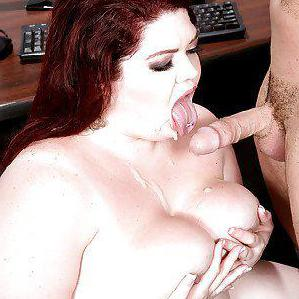

porn_GVIS_00070801.jpg


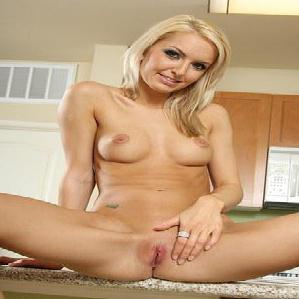

porn_GVIS_00075445.jpg


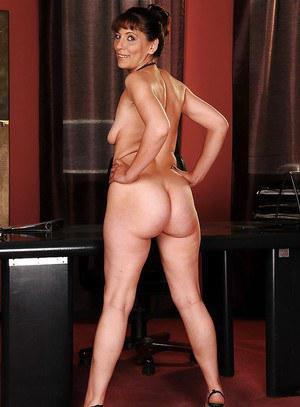

porn_GVIS_00091572.jpg


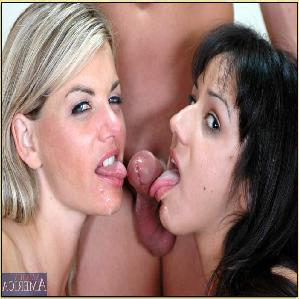

porn_GVIS_00101685.jpg


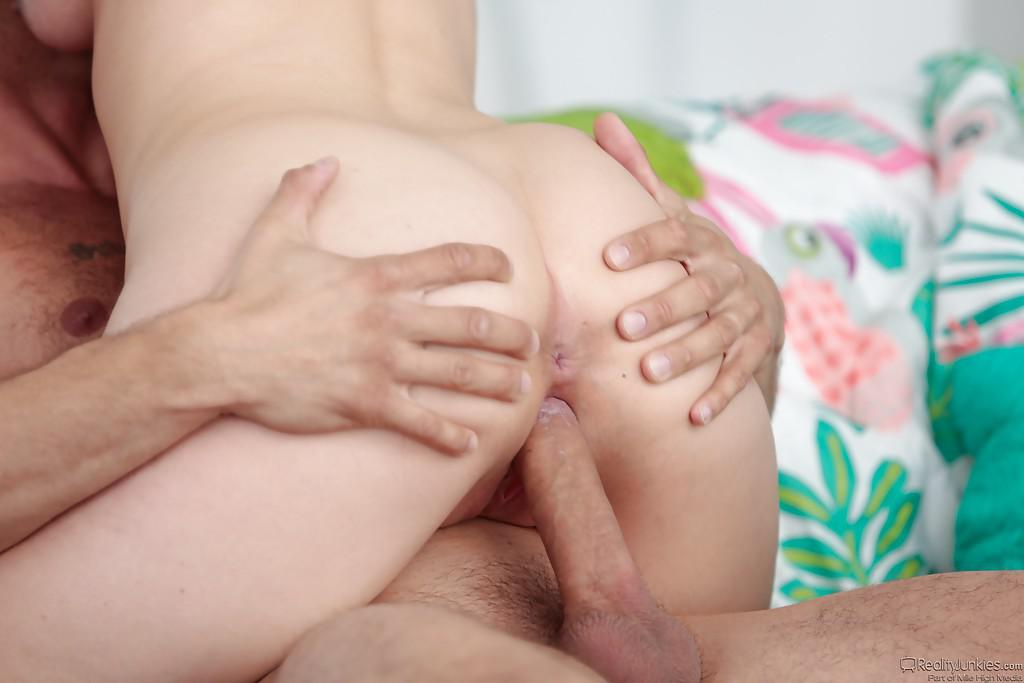

porn_GVIS_00107213.jpg


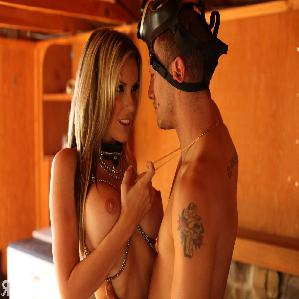

porn_GVIS_00128755.jpg


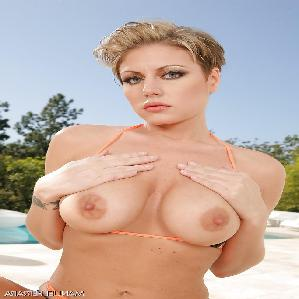

porn_GVIS_00142168.jpg


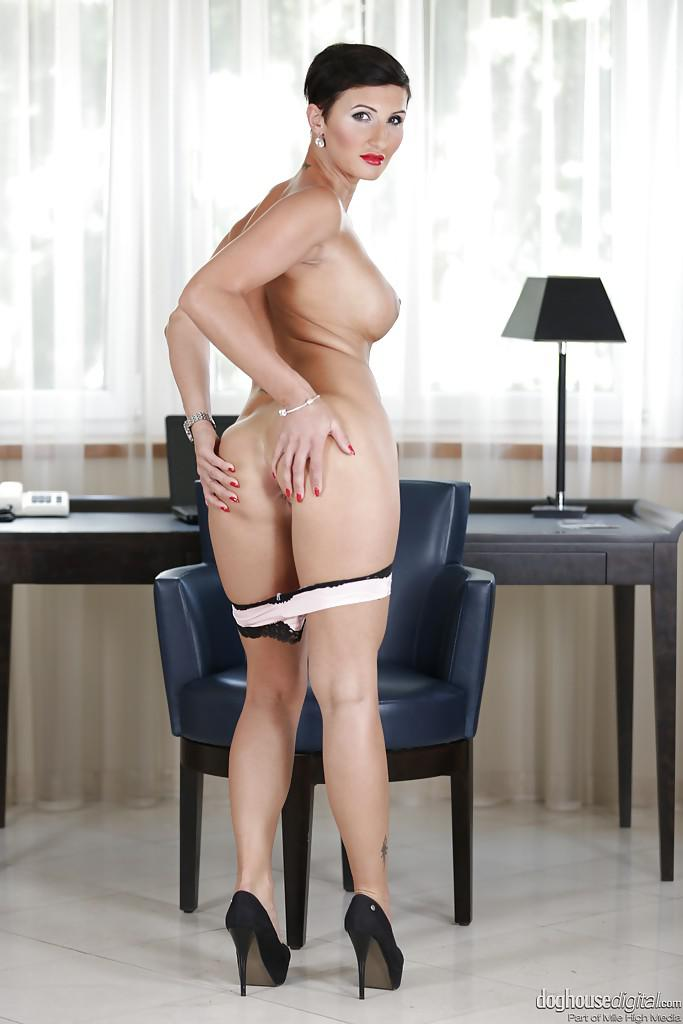

porn_GVIS_00144633.jpg


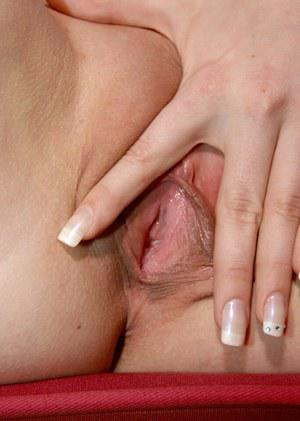

porn_GVIS_00153891.jpg


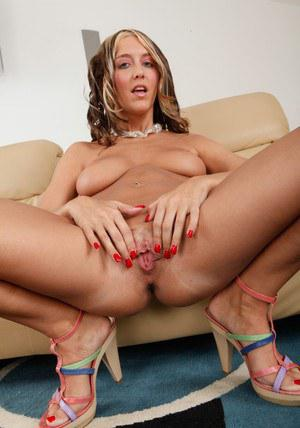

In [10]:
from PIL import Image
i = 10
for porn_img in os.listdir(porn_dir):
  if porn_img.startswith("."): continue
  if i == 0: break
  print(porn_img)
  Image.open(os.path.join(porn_dir, porn_img)).show()
  i -= 1

# Images are all of format 'porn_GVIS_<number>.jpg'